In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import pickle

In [5]:
df = pd.read_csv("/content/amazon_eda_clean.csv")

Detect numeric columns

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

Outliers Detection & Handling

In [8]:
z_scores = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
outliers = (z_scores > 3).sum(axis=0)
outlier_summary = pd.DataFrame({
    'Column': num_cols,
    'Outlier_Count': outliers,
    'Outlier_Percent': (outliers / len(df)) * 100
}).sort_values(by='Outlier_Percent', ascending=False)

print("\n🚨 Outlier Summary (Top 10 columns):")
print(outlier_summary.head(10))


🚨 Outlier Summary (Top 10 columns):
             Column  Outlier_Count  Outlier_Percent
5              year          10450         7.662077
1               qty           9285         6.807884
6             month           5950         4.362618
2            amount           2409         1.766310
4             stock           1103         0.808734
3  ship-postal-code              3         0.002200
0             index              0         0.000000
7           weekday              0         0.000000
8        is_weekend              0         0.000000
9   monthly_expense              0         0.000000


Visualize distributions for key numerical columns

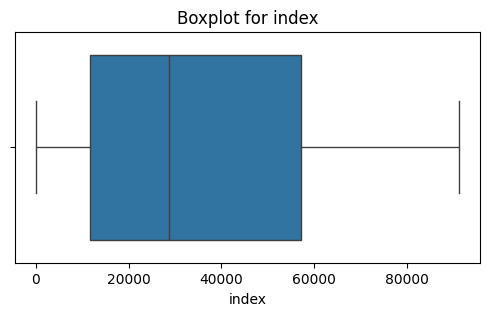

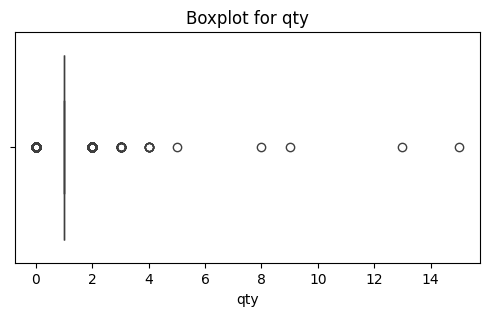

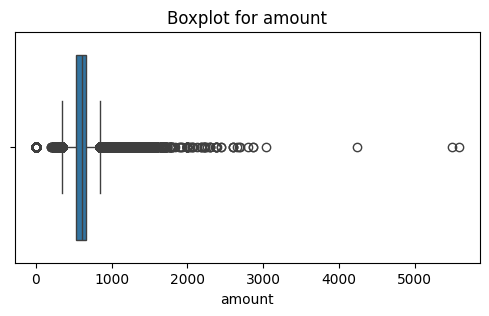

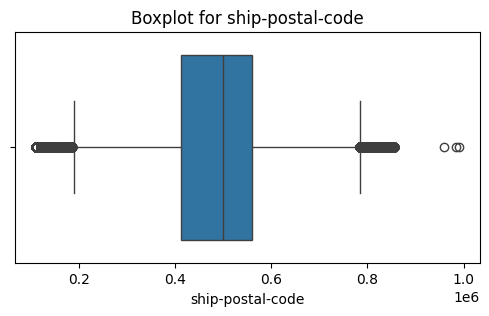

In [9]:
for col in num_cols[:4]:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


 Capping outliers at 1st and 99th percentile

In [10]:
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)

print("\n✅ Outliers capped at 1st and 99th percentiles.")



✅ Outliers capped at 1st and 99th percentiles.


Missing Values Handling

In [11]:
print("\n🔍 Checking missing values after EDA...")

missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_Percent": (missing / len(df)) * 100
})

print("\n📋 Missing Values Summary:")
print(missing_df.head(10))



🔍 Checking missing values after EDA...

📋 Missing Values Summary:
                Missing_Count  Missing_Percent
fulfilled-by           107836        79.066766
gross_amt               99994        73.316909
rate                    99994        73.316909
customer                99994        73.316909
months                  98979        72.572698
unnamed:_22             97084        71.183259
promotion-ids           80700        59.170296
currency                53374        39.134515
courier_status          53051        38.897687
ship-city               48059        35.237488


In [12]:
# Drop columns with >70% missing values
threshold = 70
cols_to_drop = missing_df[missing_df["Missing_Percent"] > threshold].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
print(f"\n🗑️ Dropped {len(cols_to_drop)} columns with more than {threshold}% missing values:")
print(cols_to_drop)

# Recalculate missing after dropping
remaining_missing = df.isna().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
print("\n✅ Remaining missing columns (after drop):")
print(remaining_missing)



🗑️ Dropped 6 columns with more than 70% missing values:
['fulfilled-by', 'gross_amt', 'rate', 'customer', 'months', 'unnamed:_22']

✅ Remaining missing columns (after drop):
promotion-ids             80700
currency                  53374
courier_status            53051
ship-city                 48059
ship-country              48058
ship-state                48058
fulfilment                48033
status                    48033
order_id                  48033
ship-service-level        48033
sales_channel             48033
asin                      48033
b2b                       48033
category                  37477
sku                       11745
style                     11641
size                       2406
stock                         1
year                          1
month                         1
weekday                       1
is_weekend                    1
monthly_expense               1
month_total_qty               1
expense_per_unit_month        1
dtype: int64


Impute remaining missing values

In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("\n✅ Missing values imputed: median (numeric), mode (categorical).")



✅ Missing values imputed: median (numeric), mode (categorical).


In [ ]:
VALIDATION

In [18]:
total_missing = df.isna().sum().sum()
print(f"\n✨ Total remaining missing values: {total_missing}")

print("\n🧠 Data Cleansing Completed Successfully!")



✨ Total remaining missing values: 0

🧠 Data Cleansing Completed Successfully!


In [19]:
df.head(10)

,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,style,sku,category,...,promotion-ids,b2b,stock,year,month,weekday,is_weekend,monthly_expense,month_total_qty,expense_per_unit_month
0,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,men5028,men5028 kr xxl,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
1,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,bl103,bl103 s,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
2,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,bl104,bl104 xl,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
3,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,bl104,bl104 m,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
4,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,bl097,bl097 m,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
5,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,men5006,men5006 kr xl,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
6,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,men5028,men5028 kr l,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
7,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,men5003,men5003 kr xxl,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
8,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,men5013,men5013 kr xxl,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0
9,340.85,171 5057375 2831560,2021-06-05,shipped,amazon,amazon in,expedited,men5013,men5013 kr s,kurta,...,in core free shipping 2015 04 08 23 48 5 108,False,8.0,2021.0,6.0,5.0,1.0,0.0,1036.0,0.0


Final Validation

In [21]:
# Remove redundant 'index' column if it's numeric or duplicated
if 'index' in df.columns:
    if df['index'].dtype != 'object' or df['index'].duplicated().all():
        df.drop(columns=['index'], inplace=True)
        print("🗑️ Dropped redundant 'index' column.")

# Reset index properly
df.reset_index(drop=True, inplace=True)

# Save again clean version
final_path = "/content/amazon_cleaned_final.csv"
df.to_csv(final_path, index=False)
print(f"💾 Final cleaned dataset saved at: {final_path}")


💾 Final cleaned dataset saved at: /content/amazon_cleaned_final.csv
